# 1. Import packages

In [3]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. A quick example

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


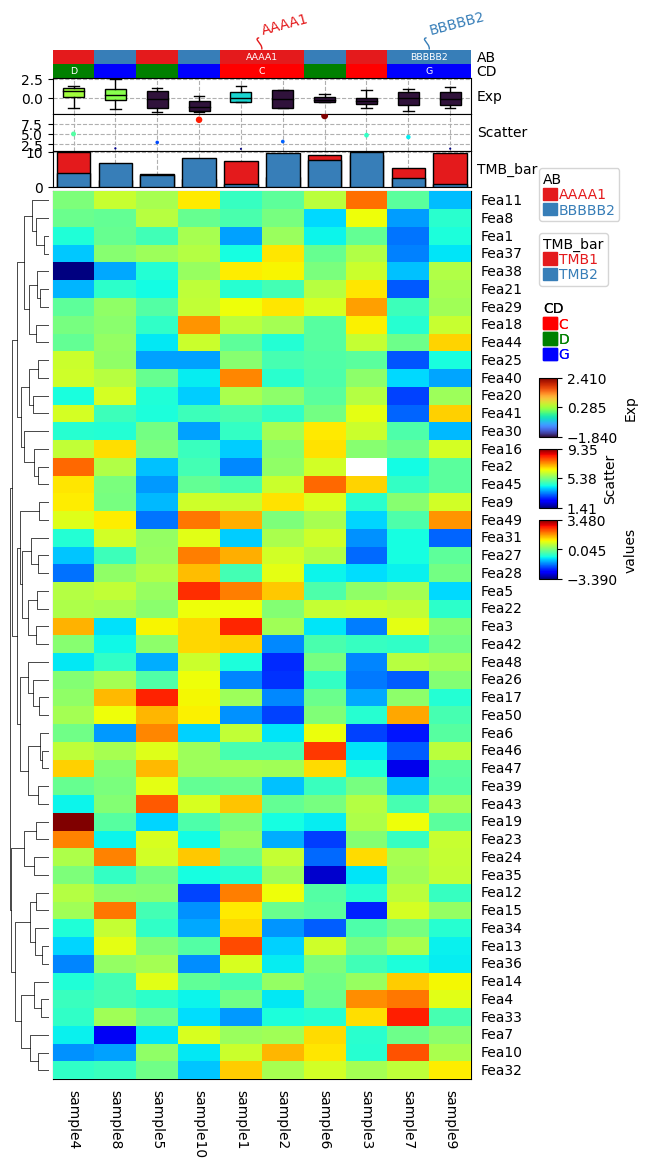

In [4]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(50, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(6, 12))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True,colors={'C':'red','D':'green','G':'blue'},
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar),
                           )
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=row_ha, col_split=None, row_split=None, col_split_gap=0.5,
                     row_split_gap=1,label='values',row_dendrogram=True,show_rownames=True,show_colnames=True,
                     tree_kws={'row_cmap': 'Dark2'})
cm.ax_heatmap.tick_params(axis='both', which='both',left=False, right=False, top=False, bottom=False)
plt.show()

In [ ]:
#cm.row_order
# cm.dendrogram_row.dendrogram['ivl']

In [ ]:
?ClusterMapPlotter

# 3. Plotting annotations

## 3.1 Only plot the row/column annotation

In [ ]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=3
                            )
plt.show()

### anno_label:
anno_label is used to add a text label to the annotatin, parameter `merge` control whether to merge the adjacent labels with the same text, if `merge` != True, then, texts would be draw for each columns.
### anno_simple:
anno_simple is to draw simple annotatin, cmap for anno_simple can be either categorical (Set1, Dark2, tab10 et.al) or continnuous (jet, turbo, parula).
Parameter add_text control whether to add text on the annotation, if the color and fontsize in text_kws was not specified, the color and fontsize would be determined automatically, for example, if the background color is deep, then the text color would be white, otherwise the text color would be black. The text color can be changed with parameter text_kws={'color':your_color},for example:

In [ ]:
plt.figure(figsize=(5, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'color':'gold'}), axis=1,
                            CD=anno_simple(df.CD,add_text=True,legend=True,text_kws={'color':'purple'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=5)
plt.show()

### To add a annotation quickly, you just need a dataframe
if df was given, all columns in dataframe df would be treated as a separately anno_simple annotation.

In [ ]:
plt.figure(figsize=(3, 3))
row_ha = HeatmapAnnotation(df=df,plot=True,legend=True)
plt.show()

## 3.2 Plot the figure and legend separately
Sometimes, one only want to plot the figure without legend, or plot the legend in a separated pdf, you can do that by giving the parameter plot_legend=False, and plot the legend in another pdf with row_ha.plot_legends

In [ ]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,plot_legend=False,
                           legend_gap=5
                            )
plt.show()

plt.figure()
row_ha.plot_legends()
plt.show()

## 3.3 Top, bottom, left ,right annotations

In [ ]:
# Load an example dataset
with open("../data/mammal_array.pkl", 'rb') as f:
    data = pickle.load(f)
df, df_rows, df_cols, col_colors_dict = data

In [ ]:
os.path.dirname(PyComplexHeatmap.__file__)

In [ ]:
df

In [ ]:
df_rows

In [ ]:
df_cols

In [ ]:
col_colors_dict

In [ ]:
#Put annotations on the top
col_ha = HeatmapAnnotation(label=anno_label(df_cols.Family, merge=True, rotation=45),
                               Family=anno_simple(df_cols.Family, legend=True),
                               Tissue=df_cols.Tissue,label_side='right', axis=1)
plt.figure(figsize=(7, 4))
cm = ClusterMapPlotter(data=df, top_annotation=col_ha,
                       show_rownames=True, show_colnames=False,row_names_side='left',
                       col_split=df_cols.Family, cmap='exp1', label='AUC',
                       rasterized=True, legend=True)
#plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

If you have a very long list of legends, the function will automatically increace another column of legend, for example, in the above plot, there are two columns of legends.

In [ ]:
#Put annotations on the bottom
col_ha = HeatmapAnnotation(Tissue=anno_simple(df_cols.Tissue,height=5),
                           Family=anno_simple(df_cols.Family, legend=False,height=6),
                           label=anno_label(df_cols.Family, merge=True,rotation=-45),
                           label_side='right',axis=1)
plt.figure(figsize=(7, 4))
cm = ClusterMapPlotter(data=df, bottom_annotation=col_ha,
                       show_rownames=True, show_colnames=False,row_names_side='right',
                       col_split=df_cols.Family, cmap='jet', label='AUC',
                       rasterized=True, legend=True)
plt.show()

If you want to put the columns annotations on the bottom, then you need to **change the order of HeatmapAnnotation**, `anno_label` should be the **last one** and `anno_label(df_cols.Family)` should be the second last one. When the columns annotation is on the top, the `rotation` of the `anno_label` is 45, but when it is on the bottom, <u>rotation should be -45</u> (rotate to the other direction).<br><br>
In addition, you can change the row labels to the right by setting `row_names_side='right'`. It's worth noting that **the gap betwee the heatmap and the legend could be automatically determined by the code** when you set `row_names_side` to the right.<br><br>
The height of the annotation bar could be changed by the parameter `height` (mm) in `anno_simple` or other kinds of annotation functions.

In [ ]:
#Put annotations on the left
row_ha = HeatmapAnnotation(label=anno_label(df_cols.Family, merge=True,rotation=45),
                           Family=anno_simple(df_cols.Family, legend=True,height=5),
                           Tissue=anno_simple(df_cols.Tissue,height=5),
                           label_side='top',
                           label_kws={'rotation':45,'rotation_mode':'anchor','color':'red'},
                           axis=0)
plt.figure(figsize=(4, 7))
cm = ClusterMapPlotter(data=df.T,left_annotation=row_ha,
                       show_rownames=False, show_colnames=True,col_names_side='top',
                       row_split=df_cols.Family, cmap='exp1', label='AUC',
                       rasterized=True, legend=True,
                       xticklabels_kws={'labelrotation':45,'labelcolor':'blue'})
plt.show()

To put annotation on the left in this example, we tranpose the dataframe by useing df.T and use left_annotation. 
We can put the columns labels on the top by set `col_names_side='top'` and use `xticklabels_kws` to change the rotation and color of the columsn labels.<br><br>
We can also change the rotation and color for the annotation labels (for example, `Family` and `Tissue` in this plot) by set `label_kws={'rotation':45,'rotation_mode':'anchor','color':'red'}`.

In [ ]:
#Put annotation on the right
row_ha = HeatmapAnnotation(Tissue=df_cols.Tissue,
                           Family=anno_simple(df_cols.Family, legend=False,height=5),
                           label=anno_label(df_cols.Family, merge=True,rotation=45),
                           label_side='bottom',
                           label_kws={'rotation':-45,'rotation_mode':'anchor','color':'red'},
                           axis=0)
plt.figure(figsize=(4, 7))
cm = ClusterMapPlotter(data=df.T,right_annotation=row_ha,
                       show_rownames=False, show_colnames=True,col_names_side='bottom',
                       row_split=df_cols.Family, cmap='jet', label='AUC',
                       rasterized=True, legend=True,
                       xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
#plt.savefig("annotation.pdf", bbox_inches='tight')
plt.show()

# 4. Plotting clustermap and annotation
Here we provided a example dataset in PyComplexHeatmap, let's visualaize it.

In [ ]:
import pickle
import urllib
f=open("../data/influence_of_snp_on_beta.pickle",'rb')
data=pickle.load(f)
f.close()
beta,snp,df_row,df_col,col_colors_dict,row_colors_dict=data

In [ ]:
# beta is DNA methylation beta values matrix, df_row and df_col are row and columns annotation respectively, col_colors_dict and row_colors_dict are color for annotation
print(beta.iloc[:,list(range(5))].head(5))
print(df_row.head(5))
print(df_col.head(5))
beta=beta.sample(2000)
snp=snp.loc[beta.index.tolist()]
df_row=df_row.loc[beta.index.tolist()]

In [ ]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target,colors=row_colors_dict['Target'],rasterized=True),
                               Group=anno_simple(df_row.Group,colors=row_colors_dict['Group'],rasterized=True),
                               axis=0)
col_ha= HeatmapAnnotation(label=anno_label(df_col.Strain,merge=True,rotation=15),
                          Strain=anno_simple(df_col.Strain,add_text=True),
                          Tissue=df_col.Tissue,Sex=df_col.Sex,axis=1)
plt.figure(figsize=(6, 10))
cm = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     row_split=df_row.loc[:, ['Target', 'Group']],
                     col_split=df_col['Strain'],cmap='parula',
                     rasterized=True,row_split_gap=1,legend=True)
#plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

## Key features:
Users can split the columns and rows into multiple subgroups by giving row_split and col_split,
row_split and col_split can be number of pandas dataframe or Series.

# 5. Composite multiple heatmap horizontally or vertically

In [ ]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target, colors=row_colors_dict['Target'], rasterized=True),
                               Group=anno_simple(df_row.Group, colors=row_colors_dict['Group'], rasterized=True),
                               axis=0)
col_ha = HeatmapAnnotation(label=anno_label(df_col.Strain, merge=True, rotation=15),
                           Strain=anno_simple(df_col.Strain, add_text=True),
                           Tissue=df_col.Tissue, Sex=df_col.Sex,
                           axis=1,verbose=0)  # df=df_col.loc[:,['Strain','Tissue','Sex']]

cm1 = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False,
                       row_dendrogram=False, col_dendrogram=False,
                       row_split=df_row.loc[:, ['Target', 'Group']],
                       col_split=df_col['Strain'], cmap='parula',
                       rasterized=True, row_split_gap=1, legend=True,
                        plot=False,label='beta')

cm2 = ClusterMapPlotter(data=snp, top_annotation=col_ha, left_annotation=row_ha,
                        show_rownames=False, show_colnames=False,
                        row_dendrogram=False, col_dendrogram=False,
                        col_cluster_method='ward',row_cluster_method='ward',
                        col_cluster_metric='jaccard',row_cluster_metric='jaccard',
                        row_split=df_row.loc[:, ['Target', 'Group']],
                        col_split=df_col['Strain'],
                        rasterized=True, row_split_gap=1, legend=True,
                        plot=False,cmap='Greys',label='SNP')

cmlist=[cm1,cm2]

plt.figure(figsize=(10,12))
composite(cmlist=cmlist, main=1,legendpad=0,legend_y=0.8)
#plt.savefig("beta_snp.pdf", bbox_inches='tight')
plt.show()